In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
#Compaies that made vaccines
import pandas as pd

lnames = ["AstraZeneca_stock.csv", "BioNTech_stock.csv", "JNJ_stock.csv", "Moderna_stock.csv", "Zhifei_stock.csv", "Pfizer_stock.csv"]

df = pd.DataFrame([])

for i in enumerate(lnames):
    print(i)
    indiv_df = pd.read_csv("/content/drive/MyDrive/JSR raw data folder/" + str(i[1]))
    indiv_df['Date'] = pd.to_datetime(indiv_df['Date'])
    if (indiv_df.iloc[0]['Date'].year > 2020):
        indiv_df = indiv_df.iloc[::-1]
    df[i[1][:-10]] = indiv_df['High']


df = df.replace({'\$': ''}, regex=True)
df = df.astype(float)

df.insert(0, "Date", indiv_df['Date'])

df['Average'] = df.mean(axis=1)

print(df)

# Drop individual company columns to keep only the 'Date' and 'Average' columns
df.drop(df.iloc[:, 1:-1], axis=1, inplace=True)

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
monthly_avg_df = df.resample('M').mean()

# Display the resulting DataFrame
monthly_avg_df.index = monthly_avg_df.index.strftime('%Y-%m')
monthly_avg_df = monthly_avg_df.loc['2019-12-31':]
print(monthly_avg_df)

vaccines_mostly_avg = monthly_avg_df

(0, 'AstraZeneca_stock.csv')
(1, 'BioNTech_stock.csv')
(2, 'JNJ_stock.csv')
(3, 'Moderna_stock.csv')
(4, 'Zhifei_stock.csv')
(5, 'Pfizer_stock.csv')
           Date  AstraZeneca  BioNTech     JNJ  Moderna     Zhifei   Pfizer  \
1257 2018-07-23      37.5224       NaN  126.68      NaN        NaN  36.6649   
1256 2018-07-24      37.4700       NaN  129.62      NaN        NaN  36.8995   
1255 2018-07-25      38.7300       NaN  129.23      NaN        NaN  37.2123   
1254 2018-07-26      38.3300       NaN  131.22      NaN        NaN  37.5056   
1253 2018-07-27      38.7000       NaN  132.27      NaN        NaN  37.6131   
...         ...          ...       ...     ...      ...        ...      ...   
4    2023-07-17      67.3050    108.77  159.87   122.84  26.733767  36.1200   
3    2023-07-18      68.2800    109.16  160.89   125.49  27.461039  36.4800   
2    2023-07-19      68.8800    110.19  160.41   126.78  28.019480  36.7000   
1    2023-07-20      69.6500    109.56  169.14   127.48  28.1

<ipython-input-4-4dcce03e3bb2>:22: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df['Average'] = df.mean(axis=1)


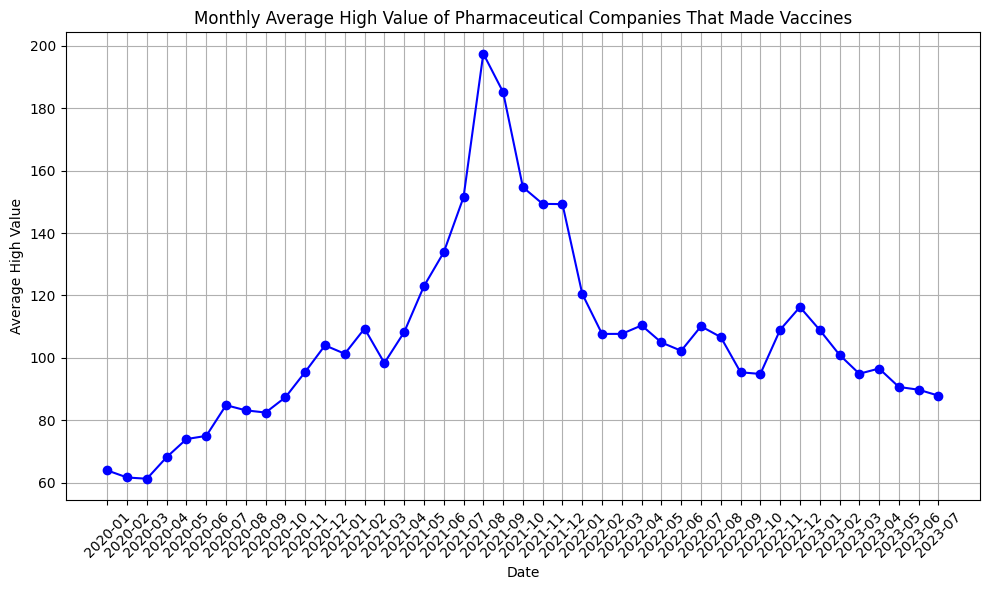

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_df.index, monthly_avg_df['Average'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Average High Value')
plt.title('Monthly Average High Value of Pharmaceutical Companies That Made Vaccines')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Compaies that didn't make vaccines
import pandas as pd

lnames = ["AbbVie_stock.csv", "BristolMyersSquibb_stock.csv", "Bayer_stock.csv", "Merck&Co_stock.csv"]

df = pd.DataFrame([])

for i in enumerate(lnames):
    print(i)
    indiv_df = pd.read_csv("/content/drive/MyDrive/JSR raw data folder/" + str(i[1]))
    indiv_df['Date'] = pd.to_datetime(indiv_df['Date'])
    if (indiv_df.iloc[0]['Date'].year > 2020):
        indiv_df = indiv_df.iloc[::-1]
    df[i[1][:-10]] = indiv_df['High']


df = df.replace({'\$': ''}, regex=True)
df = df.astype(float)

df.insert(0, "Date", indiv_df['Date'])

df['Average'] = df.mean(axis=1)

# Drop individual company columns to keep only the 'Date' and 'Average' columns
df.drop(df.iloc[:, 1:-1], axis=1, inplace=True)

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
monthly_avg_df = df.resample('M').mean()

# Display the resulting DataFrame
monthly_avg_df.index = monthly_avg_df.index.strftime('%Y-%m')
monthly_avg_df = monthly_avg_df.loc['2019-12-31':]
print(monthly_avg_df)

no_vaccines_monthly_avg = monthly_avg_df



(0, 'AbbVie_stock.csv')
(1, 'BristolMyersSquibb_stock.csv')
(2, 'Bayer_stock.csv')
(3, 'Merck&Co_stock.csv')
           Average
Date              
2020-01  65.252101
2020-02  64.727257
2020-03  56.496589
2020-04  59.198174
2020-05  61.201172
2020-06  62.688920
2020-07  63.377115
2020-08  64.062080
2020-09  62.306669
2020-10  59.318192
2020-11  63.881939
2020-12  65.449207
2021-01  67.424437
2021-02  64.647712
2021-03  64.811660
2021-04  66.271302
2021-05  68.761273
2021-06  68.263435
2021-07  69.638663
2021-08  69.509335
2021-09  65.151926
2021-10  66.154504
2021-11  68.622518
2021-12  69.461711
2022-01  73.983216
2022-02  76.300600
2022-03  80.719541
2022-04  86.230881
2022-05  84.622382
2022-06  82.799614
2022-07  83.677638
2022-08  79.590398
2022-09  78.536739
2022-10  81.190754
2022-11  87.654583
2022-12  91.391726
2023-01  88.516779
2023-02  86.934333
2023-03  86.868424
2023-04  90.682736
2023-05  86.230781
2023-06  82.238601
2023-07  81.313061


<ipython-input-6-6ce0aa7fb6de>:22: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df['Average'] = df.mean(axis=1)


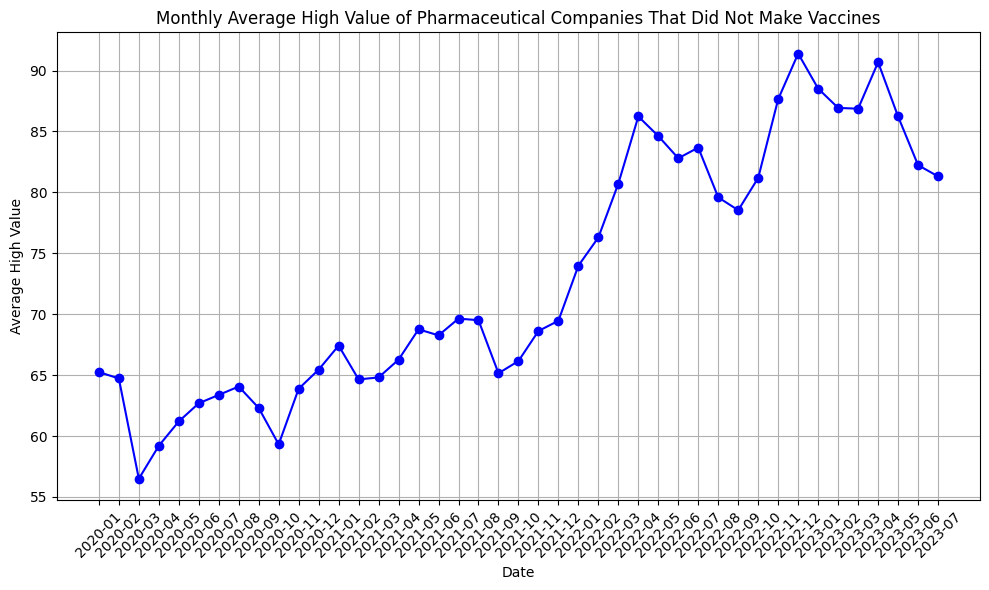

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_df.index, monthly_avg_df['Average'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Average High Value')
plt.title('Monthly Average High Value of Pharmaceutical Companies That Did Not Make Vaccines')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

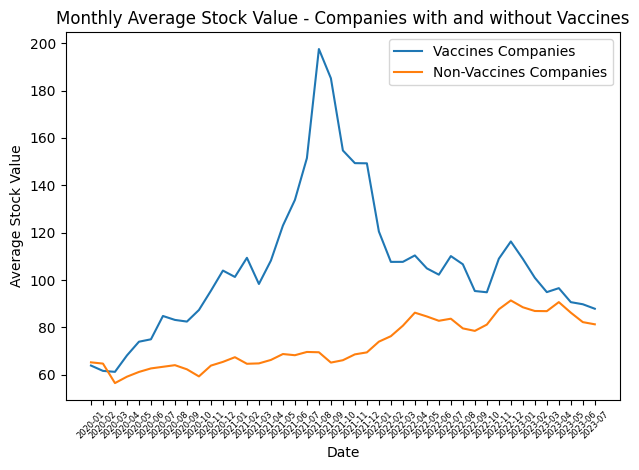

In [ ]:
plt.plot(vaccines_mostly_avg.index, vaccines_mostly_avg['Average'], label='Vaccines Companies')

plt.plot(no_vaccines_monthly_avg.index, no_vaccines_monthly_avg['Average'], label='Non-Vaccines Companies')

plt.xlabel('Date')
plt.ylabel('Average Stock Value')
plt.title('Monthly Average Stock Value - Companies with and without Vaccines')

plt.legend()

plt.xticks(rotation=45)
plt.xticks(fontsize=6)

plt.tight_layout()
plt.show()


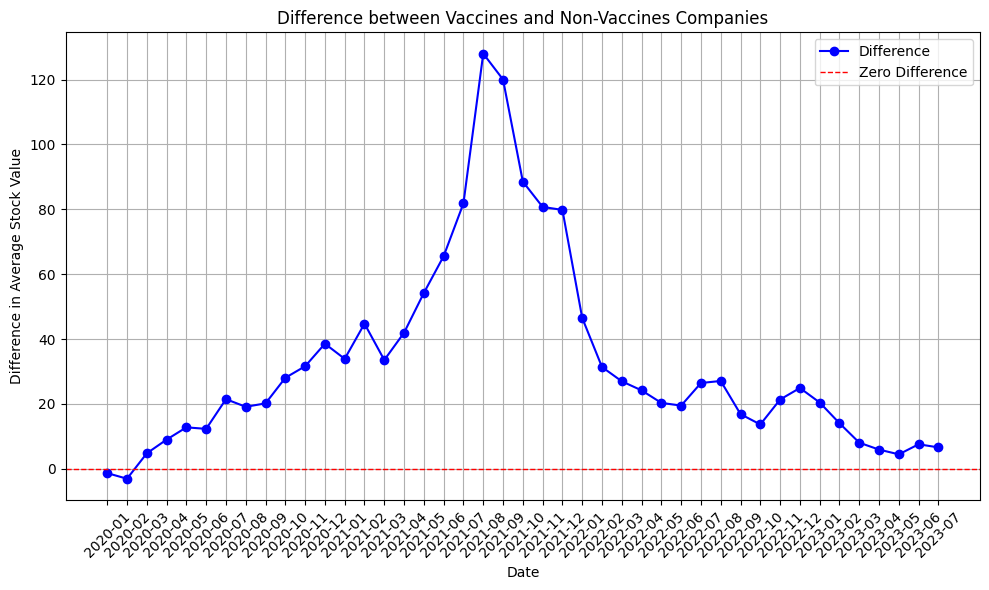

In [ ]:
#Differences between companies that made vaccines and those who didn't
difference_df = vaccines_mostly_avg - no_vaccines_monthly_avg
plt.figure(figsize=(10, 6))
plt.plot(difference_df.index, difference_df['Average'], marker='o', color='b', label='Difference')
plt.axhline(y=0, color='r', linestyle='--', linewidth=1, label='Zero Difference')
plt.xlabel('Date')
plt.ylabel('Difference in Average Stock Value')
plt.title('Difference between Vaccines and Non-Vaccines Companies')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

lnames = ["Pfizer_stock.csv"]
df = pd.DataFrame()

for fname in lnames:
    print(fname)
    indiv_df = pd.read_csv("/content/drive/MyDrive/JSR raw data folder/" + fname)
    indiv_df['Date'] = pd.to_datetime(indiv_df['Date'])
    if indiv_df.iloc[0]['Date'] > pd.to_datetime('2020-12-11'):
        indiv_df = indiv_df[indiv_df['Date'] > pd.to_datetime('2020-12-11')]
    df[fname[:-10]] = indiv_df['High']

df = df.replace({'\$': ''}, regex=True)
df = df.astype(float)

monthly_high_standardized = (df - df.mean()) / df.std()

df_standardized = pd.DataFrame(data=monthly_high_standardized, columns=df.columns)

df_standardized.insert(0, "Date", indiv_df['Date'])

df_standardized['Average'] = df_standardized.mean(axis=1)

df_standardized['Date'] = pd.to_datetime(df_standardized['Date'])
df_standardized.set_index('Date', inplace=True)

pfizer_monthly_avg_df = df_standardized.resample('M').mean()

pfizer_monthly_avg_df.index = pfizer_monthly_avg_df.index.strftime('%Y-%m')
print(pfizer_monthly_avg_df)


Pfizer_stock.csv
           Pfizer   Average
Date                       
2020-12 -1.102863 -1.102863
2021-01 -1.243458 -1.243458
2021-02 -1.594123 -1.594123
2021-03 -1.500852 -1.500852
2021-04 -1.111366 -1.111366
2021-05 -0.797387 -0.797387
2021-06 -0.864494 -0.864494
2021-07 -0.653561 -0.653561
2021-08  0.438288  0.438288
2021-09  0.024747  0.024747
2021-10 -0.359711 -0.359711
2021-11  0.768114  0.768114
2021-12  1.884833  1.884833
2022-01  1.574080  1.574080
2022-02  0.862137  0.862137
2022-03  1.027304  1.027304
2022-04  1.084624  1.084624
2022-05  0.971028  0.971028
2022-06  0.957827  0.957827
2022-07  1.097680  1.097680
2022-08  0.634371  0.634371
2022-09  0.123358  0.123358
2022-10 -0.094270 -0.094270
2022-11  0.534210  0.534210
2022-12  1.082838  1.082838
2023-01  0.299430  0.299430
2023-02 -0.267199 -0.267199
2023-03 -0.698621 -0.698621
2023-04 -0.659566 -0.659566
2023-05 -1.042920 -1.042920
2023-06 -0.989159 -0.989159
2023-07 -1.342907 -1.342907


<ipython-input-10-687563662156>:23: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_standardized['Average'] = df_standardized.mean(axis=1)


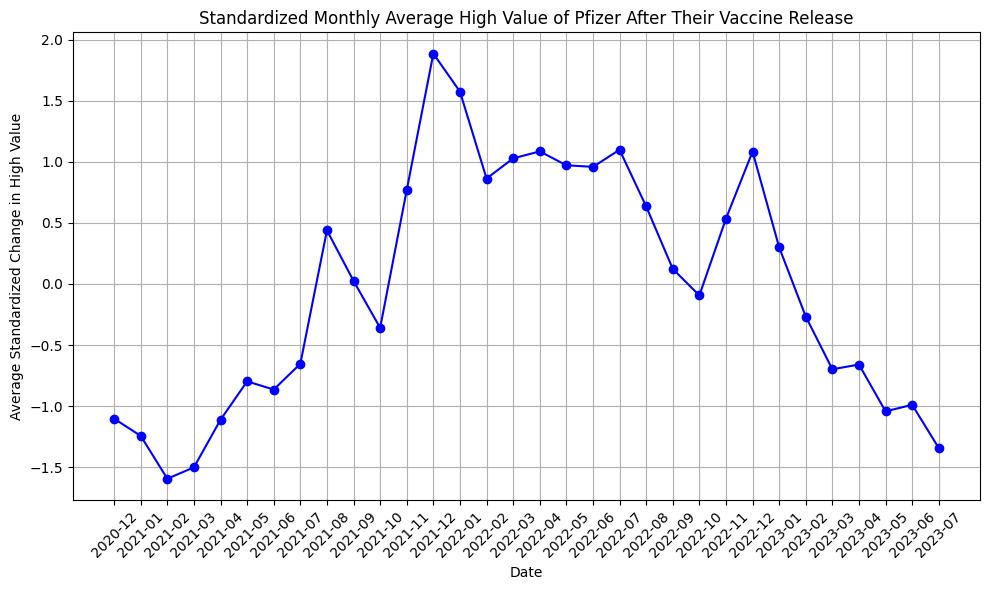

In [ ]:
#Pfizer after they released vaccines in Dec 2020
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(pfizer_monthly_avg_df.index, pfizer_monthly_avg_df['Average'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Average Standardized Change in High Value')
plt.title('Standardized Monthly Average High Value of Pfizer After Their Vaccine Release')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#JNJ
import pandas as pd

lnames = ["JNJ_stock.csv"]

df = pd.DataFrame()

for fname in lnames:
    print(fname)
    indiv_df = pd.read_csv("/content/drive/MyDrive/JSR raw data folder/" + fname)
    indiv_df['Date'] = pd.to_datetime(indiv_df['Date'])
    if indiv_df.iloc[0]['Date'] > pd.to_datetime('2020-12-11'):
        indiv_df = indiv_df[indiv_df['Date'] > pd.to_datetime('2021-02-27')]
    df[fname[:-10]] = indiv_df['High']

df = df.replace({'\$': ''}, regex=True)
df = df.astype(float)

monthly_high_standardized = (df - df.mean()) / df.std()

df_standardized = pd.DataFrame(data=monthly_high_standardized, columns=df.columns)

df_standardized.insert(0, "Date", indiv_df['Date'])

df_standardized['Average'] = df_standardized.mean(axis=1)

df_standardized['Date'] = pd.to_datetime(df_standardized['Date'])
df_standardized.set_index('Date', inplace=True)

jnj_monthly_avg_df = df_standardized.resample('M').mean()

jnj_monthly_avg_df.index = jnj_monthly_avg_df.index.strftime('%Y-%m')
print(jnj_monthly_avg_df)




JNJ_stock.csv
              JNJ   Average
Date                       
2021-03 -1.017282 -1.017282
2021-04 -0.667325 -0.667325
2021-05  0.189351  0.189351
2021-06 -0.417753 -0.417753
2021-07  0.234728  0.234728
2021-08  0.975926  0.975926
2021-09 -0.086654 -0.086654
2021-10 -0.835115 -0.835115
2021-11 -0.707773 -0.707773
2021-12 -0.137524 -0.137524
2022-01  0.238884  0.238884
2022-02 -0.020682 -0.020682
2022-03  0.767360  0.767360
2022-04  1.921383  1.921383
2022-05  1.456600  1.456600
2022-06  1.147480  1.147480
2022-07  1.057024  1.057024
2022-08  0.076107  0.076107
2022-09 -0.341380 -0.341380
2022-10 -0.155334 -0.155334
2022-11  0.877689  0.877689
2022-12  1.315605  1.315605
2023-01  0.663187  0.663187
2023-02 -0.956822 -0.956822
2023-03 -2.015663 -2.015663
2023-04 -0.634444 -0.634444
2023-05 -1.146744 -1.146744
2023-06 -0.899678 -0.899678
2023-07 -0.896656 -0.896656


<ipython-input-12-c49980693b3f>:25: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_standardized['Average'] = df_standardized.mean(axis=1)


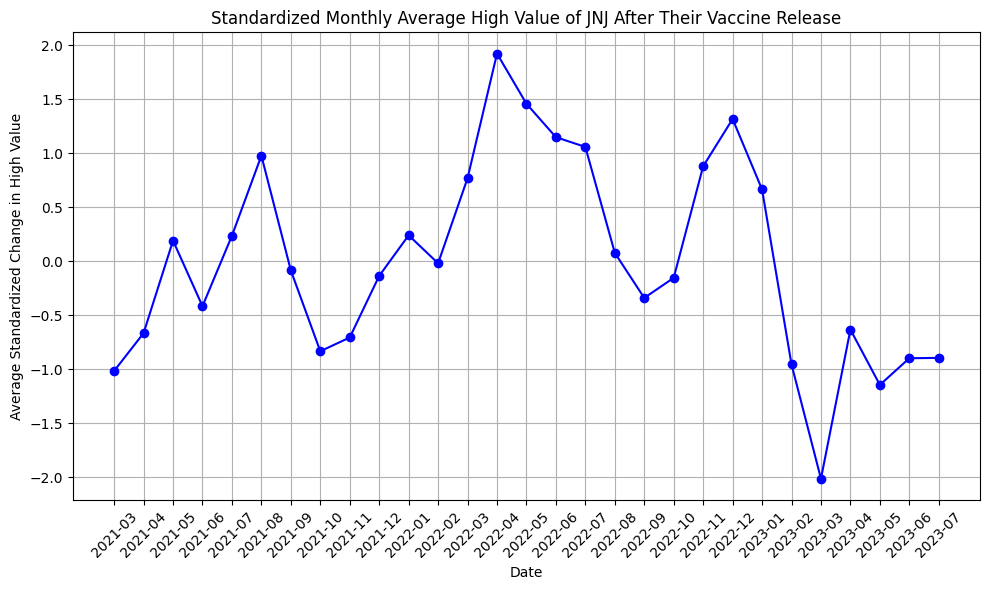

In [ ]:
#JNJ after they released vaccines in Feb 2021
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(jnj_monthly_avg_df.index, jnj_monthly_avg_df['Average'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Average Standardized Change in High Value')
plt.title('Standardized Monthly Average High Value of JNJ After Their Vaccine Release')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#AstraZeneca
import pandas as pd

lnames = ["AstraZeneca_stock.csv"]

df = pd.DataFrame()

for fname in lnames:
    print(fname)
    indiv_df = pd.read_csv("/content/drive/MyDrive/JSR raw data folder/" + fname)
    indiv_df['Date'] = pd.to_datetime(indiv_df['Date'])
    if indiv_df.iloc[0]['Date'] > pd.to_datetime('2020-12-31'):
        indiv_df = indiv_df[indiv_df['Date'] > pd.to_datetime('2020-12-31')]
    df[fname[:-10]] = indiv_df['High']

df = df.replace({'\$': ''}, regex=True)
df = df.astype(float)

monthly_high_standardized = (df - df.mean()) / df.std()

df_standardized = pd.DataFrame(data=monthly_high_standardized, columns=df.columns)

df_standardized.insert(0, "Date", indiv_df['Date'])

df_standardized['Average'] = df_standardized.mean(axis=1)

df_standardized['Date'] = pd.to_datetime(df_standardized['Date'])
df_standardized.set_index('Date', inplace=True)

astraZeneca_monthly_avg_df = df_standardized.resample('M').mean()

astraZeneca_monthly_avg_df.index = astraZeneca_monthly_avg_df.index.strftime('%Y-%m')
print(astraZeneca_monthly_avg_df)


AstraZeneca_stock.csv
         AstraZeneca   Average
Date                          
2021-01    -1.432473 -1.432473
2021-02    -1.633747 -1.633747
2021-03    -1.810158 -1.810158
2021-04    -1.543764 -1.543764
2021-05    -0.918058 -0.918058
2021-06    -0.520461 -0.520461
2021-07    -0.444342 -0.444342
2021-08    -0.517443 -0.517443
2021-09    -0.517994 -0.517994
2021-10    -0.135438 -0.135438
2021-11    -0.274250 -0.274250
2021-12    -0.794608 -0.794608
2022-01    -0.488736 -0.488736
2022-02    -0.400148 -0.400148
2022-03     0.121949  0.121949
2022-04     0.934383  0.934383
2022-05     0.499904  0.499904
2022-06     0.343307  0.343307
2022-07     0.694626  0.694626
2022-08     0.672980  0.672980
2022-09    -0.536109 -0.536109
2022-10    -0.801373 -0.801373
2022-11     0.298421  0.298421
2022-12     0.991367  0.991367
2023-01     1.072077  1.072077
2023-02     0.759276  0.759276
2023-03     0.653439  0.653439
2023-04     1.714102  1.714102
2023-05     1.805703  1.805703
2023-06     1.656

<ipython-input-14-065e9d90f3ed>:25: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_standardized['Average'] = df_standardized.mean(axis=1)


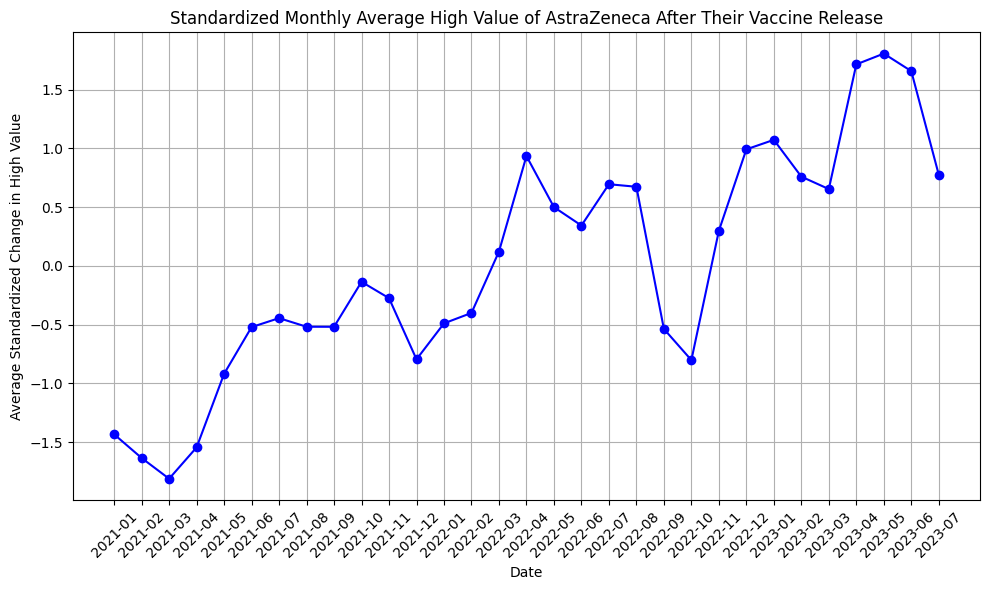

In [ ]:
#AstraZeneca after they released vaccines in Dec 2020
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(astraZeneca_monthly_avg_df.index, astraZeneca_monthly_avg_df['Average'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Average Standardized Change in High Value')
plt.title('Standardized Monthly Average High Value of AstraZeneca After Their Vaccine Release')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#BioNTech
import pandas as pd

lnames = ["BioNTech_stock.csv"]

df = pd.DataFrame()

for fname in lnames:
    print(fname)
    indiv_df = pd.read_csv("/content/drive/MyDrive/JSR raw data folder/" + fname)
    indiv_df['Date'] = pd.to_datetime(indiv_df['Date'])
    if indiv_df.iloc[0]['Date'] > pd.to_datetime('2020-12-11'):
        indiv_df = indiv_df[indiv_df['Date'] > pd.to_datetime('2020-12-11')]
    df[fname[:-10]] = indiv_df['High']

df = df.replace({'\$': ''}, regex=True)
df = df.astype(float)

monthly_high_standardized = (df - df.mean()) / df.std()

df_standardized = pd.DataFrame(data=monthly_high_standardized, columns=df.columns)

df_standardized.insert(0, "Date", indiv_df['Date'])

df_standardized['Average'] = df_standardized.mean(axis=1)

df_standardized['Date'] = pd.to_datetime(df_standardized['Date'])
df_standardized.set_index('Date', inplace=True)

BioNTech_monthly_avg_df = df_standardized.resample('M').mean()

BioNTech_monthly_avg_df.index = BioNTech_monthly_avg_df.index.strftime('%Y-%m')
print(BioNTech_monthly_avg_df)


BioNTech_stock.csv
         BioNTech   Average
Date                       
2020-12 -1.019466 -1.019466
2021-01 -1.004512 -1.004512
2021-02 -0.829428 -0.829428
2021-03 -1.013027 -1.013027
2021-04 -0.410758 -0.410758
2021-05  0.283608  0.283608
2021-06  0.712736  0.712736
2021-07  1.011428  1.011428
2021-08  2.822596  2.822596
2021-09  2.225853  2.225853
2021-10  1.230701  1.230701
2021-11  1.466245  1.466245
2021-12  1.501899  1.501899
2022-01  0.236208  0.236208
2022-02 -0.149283 -0.149283
2022-03 -0.247990 -0.247990
2022-04 -0.160204 -0.160204
2022-05 -0.281503 -0.281503
2022-06 -0.430314 -0.430314
2022-07 -0.182210 -0.182210
2022-08 -0.248354 -0.248354
2022-09 -0.503720 -0.503720
2022-10 -0.558907 -0.558907
2022-11 -0.252739 -0.252739
2022-12 -0.074395 -0.074395
2023-01 -0.417172 -0.417172
2023-02 -0.507774 -0.507774
2023-03 -0.656178 -0.656178
2023-04 -0.742143 -0.742143
2023-05 -0.941578 -0.941578
2023-06 -0.929760 -0.929760
2023-07 -0.939525 -0.939525


<ipython-input-16-de3cc432ee66>:25: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_standardized['Average'] = df_standardized.mean(axis=1)


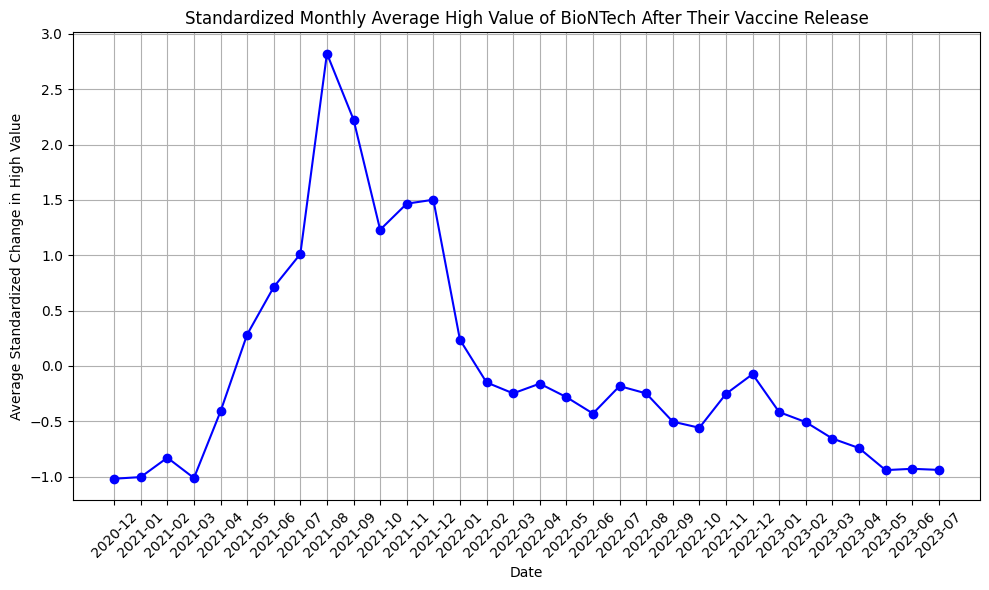

In [ ]:
#BioNTech after they released vaccines in Dec 2020
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(BioNTech_monthly_avg_df.index, BioNTech_monthly_avg_df['Average'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Average Standardized Change in High Value')
plt.title('Standardized Monthly Average High Value of BioNTech After Their Vaccine Release')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Moderna
import pandas as pd

lnames = ["Moderna_stock.csv"]

df = pd.DataFrame()

for fname in lnames:
    print(fname)
    indiv_df = pd.read_csv("/content/drive/MyDrive/JSR raw data folder/" + fname)
    indiv_df['Date'] = pd.to_datetime(indiv_df['Date'])
    if indiv_df.iloc[0]['Date'] > pd.to_datetime('2020-11-30'):
        indiv_df = indiv_df[indiv_df['Date'] > pd.to_datetime('2020-11-30')]
    df[fname[:-10]] = indiv_df['High']

df = df.replace({'\$': ''}, regex=True)
df = df.astype(float)

monthly_high_standardized = (df - df.mean()) / df.std()

df_standardized = pd.DataFrame(data=monthly_high_standardized, columns=df.columns)

df_standardized.insert(0, "Date", indiv_df['Date'])

df_standardized['Average'] = df_standardized.mean(axis=1)

df_standardized['Date'] = pd.to_datetime(df_standardized['Date'])
df_standardized.set_index('Date', inplace=True)

Moderna_monthly_avg_df = df_standardized.resample('M').mean()

Moderna_monthly_avg_df.index = Moderna_monthly_avg_df.index.strftime('%Y-%m')
print(Moderna_monthly_avg_df)

Moderna_stock.csv
          Moderna   Average
Date                       
2020-12 -0.567275 -0.567275
2021-01 -0.720053 -0.720053
2021-02 -0.252246 -0.252246
2021-03 -0.648419 -0.648419
2021-04 -0.399850 -0.399850
2021-05 -0.294320 -0.294320
2021-06  0.266799  0.266799
2021-07  1.195520  1.195520
2021-08  2.685610  2.685610
2021-09  2.923949  2.923949
2021-10  1.753130  1.753130
2021-11  1.102530  1.102530
2021-12  1.077993  1.077993
2022-01  0.086855  0.086855
2022-02 -0.408876 -0.408876
2022-03 -0.355874 -0.355874
2022-04 -0.405593 -0.405593
2022-05 -0.625841 -0.625841
2022-06 -0.659179 -0.659179
2022-07 -0.311977 -0.311977
2022-08 -0.357768 -0.357768
2022-09 -0.733882 -0.733882
2022-10 -0.725084 -0.725084
2022-11 -0.240105 -0.240105
2022-12  0.008713  0.008713
2023-01 -0.040127 -0.040127
2023-02 -0.334489 -0.334489
2023-03 -0.547989 -0.547989
2023-04 -0.537388 -0.537388
2023-05 -0.752561 -0.752561
2023-06 -0.828252 -0.828252
2023-07 -0.842481 -0.842481


<ipython-input-18-88480b07e508>:25: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_standardized['Average'] = df_standardized.mean(axis=1)


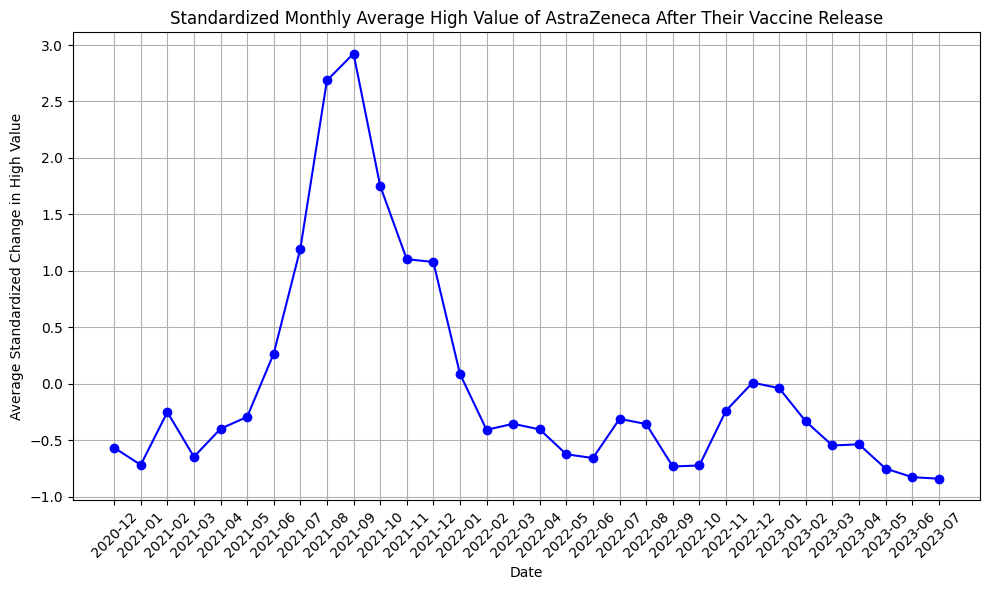

In [ ]:
#Modera after they released vaccines in Dec 2020
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(Moderna_monthly_avg_df.index, Moderna_monthly_avg_df['Average'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Average Standardized Change in High Value')
plt.title('Standardized Monthly Average High Value of AstraZeneca After Their Vaccine Release')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

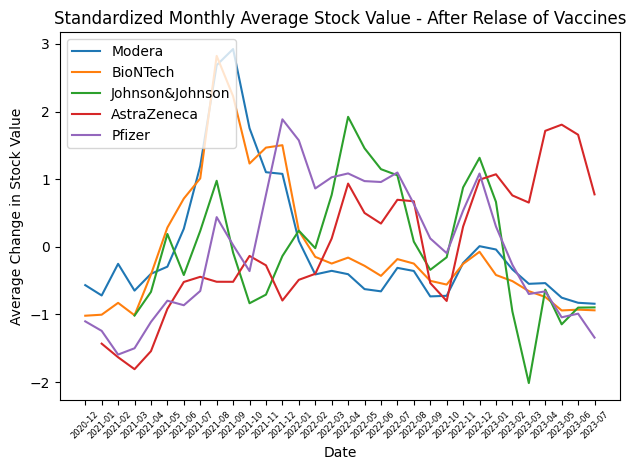

In [ ]:
plt.plot(Moderna_monthly_avg_df.index, Moderna_monthly_avg_df['Average'], label='Modera')

plt.plot(BioNTech_monthly_avg_df.index, BioNTech_monthly_avg_df['Average'], label='BioNTech')

plt.plot(jnj_monthly_avg_df.index, jnj_monthly_avg_df['Average'], label='Johnson&Johnson')

plt.plot(astraZeneca_monthly_avg_df.index, astraZeneca_monthly_avg_df['Average'], label="AstraZeneca")

plt.plot(pfizer_monthly_avg_df.index, pfizer_monthly_avg_df['Average'], label="Pfizer")

plt.xlabel('Date')
plt.ylabel('Average Change in Stock Value')
plt.title('Standardized Monthly Average Stock Value - After Relase of Vaccines')

plt.legend(loc='upper left')

plt.xticks(rotation=45)
plt.xticks(fontsize=6)

plt.tight_layout()
plt.show()
